In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read data
reviews_df_main = pd.read_excel("RC.xlsx")
reviews_df = pd.DataFrame()
reviews_df['review'] = reviews_df_main["Review"]
reviews_df['OTA'] = reviews_df_main['OTA']
#reviews_df['Service'] = reviews_df_main['Service ']
reviews_df['infoDepth'] = reviews_df_main["Information Depth"]
#reviews_df['given_sen'] = reviews_df_main["Classification : Positive /Negative"]
#reviews_df['Source'] = reviews_df_main["Source"].str.lower()

reviews_df.head()

,review,OTA,infoDepth
0,"Hello all, I am writing a review on Makemytrip...",MMT,5
1,"Hello Friends,\nI have booked a room in Raddis...",MMT,1
2,I was trying to book an intl flight for 4 pass...,MMT,NaN
3,Unbeatable match with other trip booking apps ...,MMT,4
4,They cannot be reliable in matter of hotel boo...,MMT,1


In [2]:
reviews_df["given_sen"].unique()

array(['Positive', 'Negative', 'positive', 'negative', 'positve',
       'Neutral', 'postive', 'postitive', 'eng'], dtype=object)

In [13]:
#cleaning 

#removing all the \n 
reviews_df["review"] = [x.replace("\n", " ") for x in reviews_df["review"] ]
#reviews_df.groupby(["Rating"]).groups.keys()
reviews_df.dropna(inplace= True)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 2246
Data columns (total 3 columns):
review       1899 non-null object
OTA          1899 non-null object
infoDepth    1899 non-null object
dtypes: object(3)
memory usage: 59.3+ KB


In [0]:
#Cleaning the data 
reviews_df['Service'] = reviews_df['Service'].str.lower()

#len(reviews_df.groupby(["Service"]).groups)

#reviews_df["Service"].str.contains("bus")

#reviews_df["Service"].str.contains(" ")
reviews_df['Service'].replace(' ', np.nan, inplace=True)
reviews_df['Service'].replace('-', np.nan, inplace=True)
reviews_df.dropna(inplace= True)
#len(reviews_df.groupby(["Service"]).groups.keys())
reviews_df.groupby(["Service"]).groups.keys()


In [0]:
#Creating separate dataFrame for Bus Booking , 

#bus_df = pd.DataFrame()
#bus_df = reviews_df[reviews_df["Service"].str.contains('bus')]
#bus_df.groupby(["Service"]).groups.keys()

flight_df = pd.DataFrame()
flight_df = reviews_df[reviews_df["Service"].str.contains('flight')]
flight_df.groupby(["Service"]).groups.keys()



#reviews_df[reviews_df["Service"].str.contains('bus')]
#reviews_df["Service"] = [ "bus" if service.str.contains('bus',  na=False) == True else service for service in reviews_df["Service"]  ] 
#reviews_df[(reviews_df['Service'].str.contains('bus',  na=False))].count()
#reviews_df['Service'].str.contains('bus',  na=False)

dict_keys([' flight booking', 'flight', 'flight ', 'flight bookimgt', 'flight booking', 'flight rickets', 'flight ticket', 'flight ticket, hotel rooms', 'flight tickets', 'flight tickets, hotel room', 'flight tickets, hotel room, train and bus ticket', 'flight tickets, resort', 'flight tickets,holiday packages', 'flight tickets.', 'flight, hotel', 'flight, hotel and holiday packages', 'flight, hotel rooms', 'flight, hotel, cab', 'flight, hotel, train.', 'flight, hotel.', 'flight, hotels and holiday packages', 'flight,cab,hotel', 'flight,cab,train,hotel', 'flight,hotel', 'flight,hotels', 'flight,train,bus,hotel', 'flight/hotel booking', 'flights', 'flights, hotels', 'flights,hotel booking', 'flights,hotel reservation', 'holiday package includes flight ticket, hotel room, cab service, tour service', 'holiday package, flights.', 'hotel ,flight booking', 'hotel, flights, cab, train', 'hotel,bus,flight', 'hotel,flight', 'hotel,flight booking', 'hotel,flight,bus,train,cabs', 'hotel,flight,ca

In [0]:
#Break to switch variables
#reviews_df = bus_df

reviews_df = flight_df

In [15]:

# return the wordnet object value corresponding to the POS tag
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet


def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
      
def get_noun(pos_tag):
    if pos_tag.startswith('N'):
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review"] = reviews_df["review"].apply(lambda x : str(x))
reviews_df["review_clean"] = reviews_df['review'].apply(lambda x: clean_text(x))

reviews_df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,review,OTA,infoDepth,review_clean
0,"Hello all, I am writing a review on Makemytrip...",MMT,5,hello write review makemytrip.com reference ex...
1,"Hello Friends, I have booked a room in Raddiso...",MMT,1,hello friend book room raddison atrium banglor...
3,Unbeatable match with other trip booking apps ...,MMT,4,unbeatable match trip book apps trust worthy a...
4,They cannot be reliable in matter of hotel boo...,MMT,1,cannot reliable matter hotel booking happen ha...
10,I had recently visited Udipur( rajsthan) with ...,MMT,4,recently visit udipur rajsthan family vacation...


In [16]:
# add sentiment anaylsis columns
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)
reviews_df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review,OTA,infoDepth,review_clean,neg,neu,pos,compound
0,"Hello all, I am writing a review on Makemytrip...",MMT,5,hello write review makemytrip.com reference ex...,0.000,0.785,0.215,0.9970
1,"Hello Friends, I have booked a room in Raddiso...",MMT,1,hello friend book room raddison atrium banglor...,0.097,0.860,0.043,-0.4435
3,Unbeatable match with other trip booking apps ...,MMT,4,unbeatable match trip book apps trust worthy a...,0.000,0.729,0.271,0.9837
4,They cannot be reliable in matter of hotel boo...,MMT,1,cannot reliable matter hotel booking happen ha...,0.000,0.954,0.046,0.4310
10,I had recently visited Udipur( rajsthan) with ...,MMT,4,recently visit udipur rajsthan family vacation...,0.000,0.825,0.175,0.9575


In [0]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [20]:
total_positive = len(reviews_df[reviews_df["compound"] >= 0 ])
total_negative = len(reviews_df[reviews_df["compound"] < 0 ])
print("negative reviews:", total_negative )
print("positive reviews:", total_positive )
total = total_negative + total_positive
print("total: ", total )
#reviews_df[reviews_df["compound"] < 0 ].sort_values("compound", ascending=True)[["review","OTA", "neg","pos", "compound"]].head()

negative reviews: 927
positive reviews: 972
total:  1899


In [21]:
# highest positive sentiment reviews (with more than 5 words)
#reviews_df[reviews_df["nb_words"] >= 5].sort_values("compound", ascending = False)[["review","OTA","Rating", "pos","neg", "compound"]].head(10)
reviews_df_temp = reviews_df[reviews_df["review_clean"].str.contains('information')]
reviews_df_temp

,review,OTA,infoDepth,review_clean,neg,neu,pos,compound,nb_chars,nb_words
47,"Hello Guys,I have been booking form MMT from p...",MMT,4,"hello guys,i book form mmt past year book indi...",0.026,0.729,0.244,0.9756,695,107
52,"Hello Guys,I have been booking form MMT from p...",MMT,4,"hello guys,i book form mmt past year book indi...",0.026,0.729,0.244,0.9756,695,107
57,FOR ME MAKE MY TRIP IS THE ONE OF THE BEST AND...,MMT,4,make trip one best affordable package provider...,0.000,0.792,0.208,0.9500,380,70
73,On 26th dec I booked room in uttarakhand for 2...,MMT,4,dec book room uttarakhand thankful makemytrip ...,0.058,0.821,0.120,0.8556,668,124
81,So makemytrip is genuinely a good website to p...,MMT,4,makemytrip genuinely good website plan vacatio...,0.000,0.853,0.147,0.9201,530,93
85,Hello friends. Today I Want to give my own exp...,MMT,5,hello friend today want give experience makemy...,0.018,0.713,0.269,0.9823,559,101
90,It's very cool website for hotal and Trip time...,MMT,5,cool website hotal trip time service good give...,0.000,0.741,0.259,0.9368,262,49
113,So makemytrip is genuinely a good website to p...,MMT,4,makemytrip genuinely good website plan vacatio...,0.000,0.845,0.155,0.9201,525,88
114,Funny enough MakeMyTrip doesn't have a review ...,MMT,1,funny enough makemytrip review section recentl...,0.062,0.901,0.037,-0.7400,1556,288
147,I had the worst experience booking the makemyt...,MMT,3,bad experience book makemytrip cab service get...,0.067,0.881,0.052,-0.8971,5473,1073


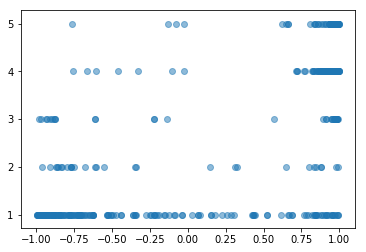

In [25]:
import matplotlib.pyplot as plt
x = reviews_df[reviews_df["OTA"] == "MMT"]["compound"]
y = reviews_df[reviews_df["OTA"] == "MMT"]["infoDepth"]
plt.yticks(np.arange(1, 6, 1))
plt.scatter(x, y,alpha=0.5)
plt.show()

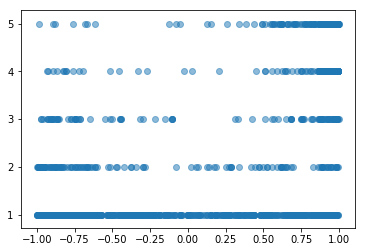

In [0]:
x = reviews_df["compound"]
y = reviews_df["Rating"]
plt.yticks(np.arange(1, 6, 1))
plt.scatter(x, y,alpha=0.5)
plt.show()


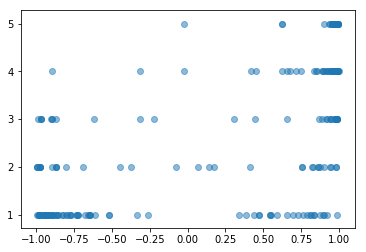

In [31]:
import matplotlib.pyplot as plt
x = reviews_df_temp["compound"]
y = reviews_df_temp["infoDepth"]
plt.yticks(np.arange(1, 6, 1))
plt.scatter(x, y,alpha=0.5)
plt.show()

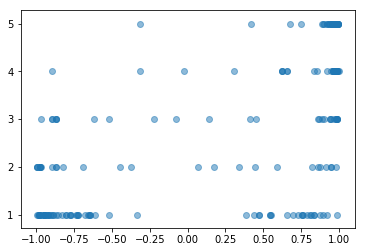

In [0]:
x = reviews_df_temp["compound"]
y = reviews_df_temp["Rating"]
plt.yticks(np.arange(1, 6, 1))
plt.scatter(x, y,alpha=0.5)
plt.show()


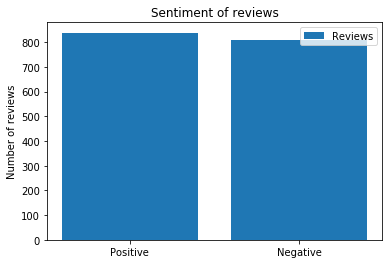

In [0]:
sentiment=['Positive','Negative']
revenue=[total_positive, total_negative]
xpos = np.arange(len(sentiment))
plt.bar(xpos,revenue, label="Reviews")

plt.xticks(xpos,sentiment)
plt.ylabel("Number of reviews")
plt.title('Sentiment of reviews')
plt.legend()

In [0]:

#reviews_df[reviews_df['OTA'] == 'MMT'].sort_values("compound", ascending = True)[["review","OTA",  "neg","pos", "compound"]].head(10)
'''
mmt_pos = len(reviews_df[(reviews_df['OTA'] == 'MMT') & (reviews_df["compound"] > 0 ) ])
mmt_neg = len(reviews_df[(reviews_df['OTA'] == 'MMT') & (reviews_df["compound"] < 0 ) ])
yatra_pos = len(reviews_df[(reviews_df['OTA'] == 'Yatra') & (reviews_df["compound"] > 0 ) ])
yatra_neg = len(reviews_df[(reviews_df['OTA'] == 'Yatra') & (reviews_df["compound"] < 0 ) ])
'''
pos = reviews_df[reviews_df["compound"]  >= 0 ].groupby('OTA')["OTA"].apply(list)
neg = reviews_df[reviews_df["compound"]  < 0 ].groupby('OTA')["OTA"].apply(list)


OTA = []
posi = []
negi = []
for i in range(len(pos)):
  OTA.append(pos[i][0])
  posi.append(len(pos[i]))
  negi.append(len(neg[i]))
  print(OTA[i]," : Positive:  ", posi[i], " Negative: ", negi[i])




ClearTrip  : Positive:   31  Negative:  66
Goibibo  : Positive:   50  Negative:  48
MMT  : Positive:   51  Negative:  46
Yatra  : Positive:   2  Negative:  6


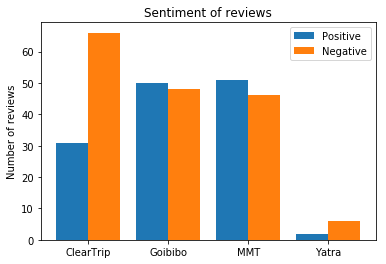

In [0]:
xpos = np.arange(len(OTA))
plt.bar(xpos-0.2,posi, width=0.4, label="Positive")
plt.bar(xpos+0.2,negi, width=0.4,label="Negative")

plt.xticks(xpos,OTA)
plt.ylabel("Number of reviews")
plt.title('Sentiment of reviews')
plt.legend()

In [0]:
reviews_df["words"] = reviews_df["review_clean"].apply(lambda x: x.split(" "))
reviews_df.head()


,review,OTA,Service,review_clean,neg,neu,pos,compound,nb_chars,nb_words,words
2,I was trying to book an intl flight for 4 pass...,MMT,flight booking,try book intl flight passenger chennai bangkok...,0.019,0.807,0.173,0.9412,543,100,"[try, book, intl, flight, passenger, chennai, ..."
6,Recently I booked Flight ticket of my child fr...,MMT,flight,recently book flight ticket child delhi amster...,0.049,0.870,0.082,0.4939,498,96,"[recently, book, flight, ticket, child, delhi,..."
8,On 28 Nov 2017 I had booked a flight ticket fo...,MMT,flight,nov book flight ticket kolkata bagdogra book d...,0.060,0.827,0.113,0.8263,917,158,"[nov, book, flight, ticket, kolkata, bagdogra,..."
12,I had booked a flight from Dunedin to Delhi on...,MMT,flight,book flight dunedin delhi dec book customer ca...,0.104,0.806,0.090,-0.5916,687,125,"[book, flight, dunedin, delhi, dec, book, cust..."
14,Here is complete feedback regarding the above ...,MMT,flight,complete feedback regard book first hitch time...,0.089,0.846,0.066,-0.5267,807,139,"[complete, feedback, regard, book, first, hitc..."


In [0]:


def WordClassifier1(row):
  posi_words = []
  for word in row:
    if (sid.polarity_scores(word)['compound']) >= 0.5:
        posi_words.append(word)
    
  return posi_words

def WordClassifier2(row):
  negi_words = []
  for word in row:
    if (sid.polarity_scores(word)['compound']) <= -0.5:
        negi_words.append(word)
   
  return negi_words
  

def WordClassifier3(row):
  
  neu_words = []
  for word in row:
    if not (sid.polarity_scores(word)['compound']) >= 0.5   and not (sid.polarity_scores(word)['compound']) <= -0.5:
        neu_words.append(word)
    
  return neu_words
  
  
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


#abc = []  
#reviews_df = reviews_df["words"].apply(WordClassifier )
#abc_df["posi_words" , "neu_words" , "negi_words"] = reviews_df["words"].apply(lambda x: WordClassifier1(x))

reviews_df["posi_words"] = reviews_df["words"].apply(lambda x: WordClassifier1(x))
reviews_df["negi_words"] = reviews_df["words"].apply(lambda x: WordClassifier2(x))
reviews_df["neu_words"] = reviews_df["words"].apply(lambda x: WordClassifier3(x))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
#breaking point to select overall or just the OTA wise data 
#ClearTrip', 'Goibibo', 'MMT', 'Redbus', 'Yatra'

#reviews_df = reviews_df[reviews_df["OTA"] == "MMT"]
#reviews_df


In [0]:
#collecting the total number of words from all reviews in one list

#reviews_df["review_clean"].value_counts()


total_pos_words = []
total_neg_words = []

for i in reviews_df["posi_words"]:
  for j in i:
    total_pos_words.append(j)
    
for i in reviews_df["negi_words"]:
  for j in i:
    total_neg_words.append(j)

In [0]:
#counting the occurences of the total number of words in positive and negative 
#list.count(total_pos_words)

total_poswords_df = pd.DataFrame()
total_negwords_df = pd.DataFrame()
total_poswords_df["words"] = total_pos_words 
total_negwords_df["words"] = total_neg_words
#wordfreq = [total_pos_words.count(w) for w in total_pos_words]
total_poswords_df["freq"] = [total_pos_words.count(w) for w in total_pos_words]
total_negwords_df["freq"] = [total_neg_words.count(w) for w in total_neg_words]
#total_negwords_df


In [0]:
#removing duplicates
total_poswords_df = total_poswords_df.drop_duplicates()
total_negwords_df = total_negwords_df.drop_duplicates()

#total_words_df.drop_duplicates(keep=False,inplace=True)

#total_words_df.sort_values("freq", inplace=True) 
#np.sum(total_negwords_df["freq"])



In [0]:
#most occuring positive words
total_poswords_df.sort_values("freq" , ascending = False).head(10)

,words,freq
0,best,54
18,free,23
16,great,16
1,trust,16
19,happy,11
36,excellent,8
23,kind,6
55,perfect,5
10,honest,4
71,trustworthy,4


In [0]:
#most occuring negative words
total_negwords_df.sort_values("freq" , ascending = False).head(10)

,words,freq
3,bad,71
5,fraud,32
64,failed,16
11,fail,16
8,cheater,12
42,worst,7
45,horrible,6
40,stupid,6
17,pathetic,6
6,scam,5


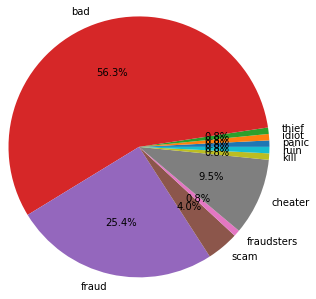

In [0]:
import matplotlib.pyplot as plt

#words = [ x for x in total_neg_words["words"] ]
#total_negwords_df["words"]
plt.pie(total_negwords_df["freq"].head(10),labels=total_negwords_df["words"].head(10), autopct='%1.1f%%',radius=1.5)
#plt.pie(total_poswords_df["freq"].head(10),labels=total_poswords_df["words"].head(10), autopct='%1.1f%%',radius=1.5)
plt.show()

In [0]:
reviews_df[(reviews_df["Rating"] == 1.0) & (reviews_df["compound"] > 0.5) ]

,review,OTA,Rating,review_clean,neg,neu,pos,compound,nb_chars,nb_words
20,"Booked a flight for Dubai, MMT was running an ...",MMT,1.0,book flight dubai mmt run offer cashback hdfc ...,0.139,0.701,0.160,0.9152,2125,398
48,Kind Attn: Mr Amol Metkar With respect to the ...,MMT,1.0,kind attn mr amol metkar respect three booking...,0.021,0.893,0.086,0.7783,569,105
49,Do not book this cheater horrible they are htt...,MMT,1.0,book cheater horrible http://www.appleholidays...,0.045,0.805,0.150,0.9904,1861,337
53,Beware of hotel bookings that you do through M...,MMT,1.0,beware hotel booking mmt confirmation mail sm ...,0.051,0.856,0.093,0.9544,2450,462
133,"Hello Friends, today I would like to share an ...",MMT,1.0,hello friend today would like share incident f...,0.041,0.846,0.113,0.8482,650,136
161,Especially if you're a woman and you want to t...,MMT,1.0,especially woman want travel safely india swit...,0.024,0.918,0.059,0.6850,755,139
164,"Hello all, I am writing a review on Makemytrip...",MMT,1.0,hello write review makemytrip.com reference ex...,0.090,0.803,0.108,0.8976,6305,1059
173,I booked a hotel ticket for 4 adults for 2 nig...,MMT,1.0,booked hotel ticket adult night stay mumbai ho...,0.088,0.759,0.153,0.9531,1503,282
183,MMT personals are not having the value of thei...,MMT,1.0,mmt personal value word book bus service mmt a...,0.053,0.807,0.140,0.8613,507,90
186,I booked a business room in a hotel in hyderab...,MMT,1.0,booked business room hotel hyderabad mmt accom...,0.068,0.797,0.135,0.8832,767,145
